In [1]:
import numpy as np

import tszip

import sgkit as sg

import sys
sys.path.append("../../tsimpute/src/")
import util


In [2]:
paths_file = "../analysis/lshmm/h2_p25.npy"
paths = np.load(paths_file)
paths.shape


(352, 504314)

In [3]:
ref_ts_file = "../data/trees/ref.tsz"
ref_ts = tszip.decompress(ref_ts_file)
ref_ts


In [4]:
target_chip_compat_zarr_dir = "../data/zarr/target_chip_compat.zarr/"
target_chip_compat_ds = sg.load_dataset(target_chip_compat_zarr_dir)
target_chip_compat_ds


<xarray.Dataset>
Dimensions:             (variants: 7899, samples: 176, ploidy: 2, contigs: 1,
                         alleles: 4)
Dimensions without coordinates: variants, samples, ploidy, contigs, alleles
Data variables:
    call_genotype       (variants, samples, ploidy) float64 dask.array<chunksize=(1975, 44, 1), meta=np.ndarray>
    call_genotype_mask  (variants, samples, ploidy) bool dask.array<chunksize=(3950, 88, 1), meta=np.ndarray>
    contig_id           (contigs) <U2 dask.array<chunksize=(1,), meta=np.ndarray>
    sample_id           (samples) object dask.array<chunksize=(176,), meta=np.ndarray>
    variant_allele      (variants, alleles) <U1 dask.array<chunksize=(7899, 4), meta=np.ndarray>
    variant_contig      (variants) int8 dask.array<chunksize=(7899,), meta=np.ndarray>
    variant_position    (variants) int32 dask.array<chunksize=(7899,), meta=np.ndarray>
Attributes:
    contigs:  ['20']
    source:   sgkit-0.7.0

In [5]:
is_switch = np.zeros_like(paths, dtype=bool)
for i in np.arange(paths.shape[0]):
    path = util.SamplePath(
        individual="tmp",
        nodes=paths[i, :],
        site_positions=ref_ts.sites_position,
    )
    is_switch[i, :] = util.get_switch_mask(path)
is_switch = is_switch.astype(int)
is_switch


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [6]:
total_num_switches = np.apply_along_axis(sum, axis=0, arr=is_switch)
total_num_switches.shape


(504314,)

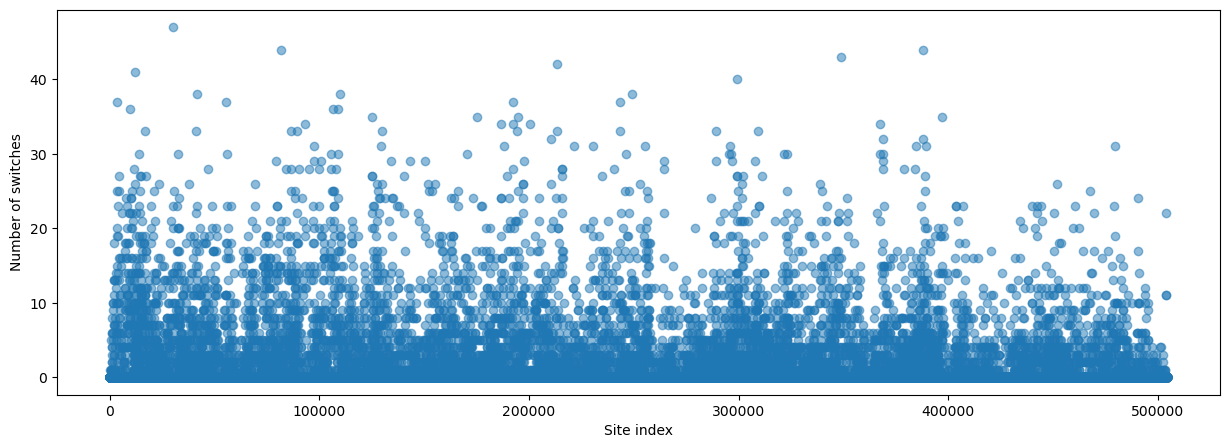

In [12]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15, 5))
plt.scatter(
    x=np.arange(len(total_num_switches)),
    y=total_num_switches,
    alpha=0.5,
)
plt.ylabel('Number of switches')
plt.xlabel('Site index');


In [14]:
switch_site_pos = ref_ts.sites_position[total_num_switches > 0]
switch_site_pos


array([  236640.,   253732.,   256161., ..., 26196177., 26213468.,
       26217295.])

In [15]:
target_chip_compat_ds.variant_position.values


array([  227527,   229420,   229665, ..., 26213468, 26217295, 26218217],
      dtype=int32)

In [16]:
np.all(np.isin(switch_site_pos, target_chip_compat_ds.variant_position.values))


True